# <center><div style="font-family: Trebuchet MS; background-color: #AED6F2; color: #3498DB; padding: 12px; line-height: 1;">Cell2Cell Duke University Telco Dataset Analysis</div></center>

#### <center> Kwok Sze Ming [22022177D]</center>
- Dataset Link: https://www.kaggle.com/datasets/geoamins/cell2cell-duke-university-telco-dataset


<center>
    <img src="https://media.licdn.com/dms/image/D4D12AQHehFjrFpLb-A/article-cover_image-shrink_720_1280/0/1692565495463?e=1717632000&v=beta&t=N1y1bjgVJB1of4dSQd67M0DIPHTPvM1tmkpg4mLUFgY" alt="Telco" width="50%">
</center>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C:/Users/user/Desktop/0capstone/cell2cell_duke/cell2cell_duke.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_21372\3058419429.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/user/Desktop/0capstone/cell2cell_duke/cell2cell_duke.csv")


In [3]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 71047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             70831 non-null  float64
 3   MonthlyMinutes             70831 non-null  float64
 4   TotalRecurringCharge       70831 non-null  float64
 5   DirectorAssistedCalls      70831 non-null  float64
 6   OverageMinutes             70831 non-null  float64
 7   RoamingCalls               70831 non-null  float64
 8   PercChangeMinutes          70545 non-null  float64
 9   PercChangeRevenues         70545 non-null  float64
 10  DroppedCalls               71047 non-null  float64
 11  BlockedCalls               71047 non-null  float64
 12  UnansweredCalls            71047 non-null  float64
 13  CustomerCareCalls          71047 non-null  flo

In [5]:
for column, dtype in data.dtypes.iteritems():
    if dtype == 'object':
        print(f"{column} is categorical.")

Churn is categorical.
ServiceArea is categorical.
ChildrenInHH is categorical.
HandsetRefurbished is categorical.
HandsetWebCapable is categorical.
TruckOwner is categorical.
RVOwner is categorical.
Homeownership is categorical.
BuysViaMailOrder is categorical.
RespondsToMailOffers is categorical.
OptOutMailings is categorical.
NonUSTravel is categorical.
OwnsComputer is categorical.
HasCreditCard is categorical.
NewCellphoneUser is categorical.
NotNewCellphoneUser is categorical.
OwnsMotorcycle is categorical.
HandsetPrice is categorical.
MadeCallToRetentionTeam is categorical.
CreditRating is categorical.
PrizmCode is categorical.
Occupation is categorical.
MaritalStatus is categorical.


# Get the column names with missing values

In [6]:
# Get the column names with missing values
columns_with_missing_values = data.columns[data.isna().any()].tolist()

# Print the column names with missing values
print(columns_with_missing_values)

['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']


In [7]:
from sklearn.impute import SimpleImputer
original_values = data.copy()

# Numeric columns for mean imputation
numeric_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
                   'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
                   'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']

# Categorical columns for mode imputation
categorical_columns = ['ServiceArea']

# Impute missing values using mean imputation for numeric columns
for column in numeric_columns:
    mean_imputer = SimpleImputer(strategy='mean')
    data[column] = mean_imputer.fit_transform(data[[column]])

# Impute missing values using mode imputation for categorical columns
for column in categorical_columns:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data[column] = mode_imputer.fit_transform(data[[column]])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 71047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             71047 non-null  float64
 3   MonthlyMinutes             71047 non-null  float64
 4   TotalRecurringCharge       71047 non-null  float64
 5   DirectorAssistedCalls      71047 non-null  float64
 6   OverageMinutes             71047 non-null  float64
 7   RoamingCalls               71047 non-null  float64
 8   PercChangeMinutes          71047 non-null  float64
 9   PercChangeRevenues         71047 non-null  float64
 10  DroppedCalls               71047 non-null  float64
 11  BlockedCalls               71047 non-null  float64
 12  UnansweredCalls            71047 non-null  float64
 13  CustomerCareCalls          71047 non-null  flo

In [8]:
# Get the column names with missing values
columns_with_missing_values = data.columns[data.isna().any()].tolist()

# Print the column names with missing values
print(columns_with_missing_values)

['Churn']


In [9]:
train_df = data.copy()
train_df.dropna(subset=['Churn'], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

## All missing values are removed. 
### train_df: 51047 rows, 58 columns

In [10]:
print('Train data:')
print('There are' , train_df.shape[0] , 'rows')
print('There are' , train_df.shape[1] , 'columns')
print('There is' , train_df.duplicated().sum() ,'duplicated')
print('=====================================================')
print('Number of Churn:')
print(train_df['Churn'].value_counts())

Train data:
There are 51047 rows
There are 58 columns
There is 0 duplicated
Number of Churn:
No     36336
Yes    14711
Name: Churn, dtype: int64


# Yes:1, No:0

In [11]:
# Define a dictionary to map values
mapping = {'Yes': 1, 'No': 0, 'Known':1, 'Unknown': 0}

# Apply mapping to all columns
train_df = train_df.replace(mapping)

Number of people not churned as 0 are 36336 and Number of people churned as 1 are 14711


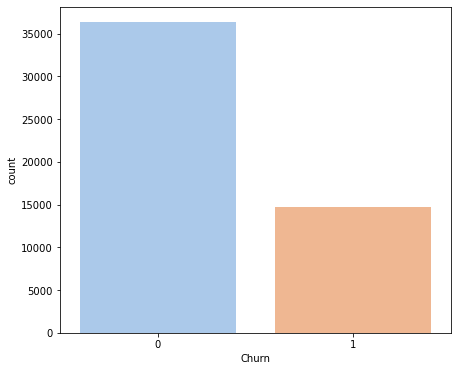

In [18]:
print(f'Number of people not churned as 0 are {train_df.Churn.value_counts()[0]} and Number of people churned as 1 are {train_df.Churn.value_counts()[1]}')
plt.figure(figsize=(7,6))
ax=plt.axes()
p = sns.countplot(data=train_df, x="Churn", palette='pastel')
ax=plt.axis()

<Figure size 1080x432 with 0 Axes>

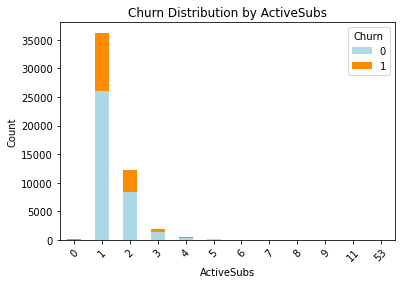

<Figure size 1080x432 with 0 Axes>

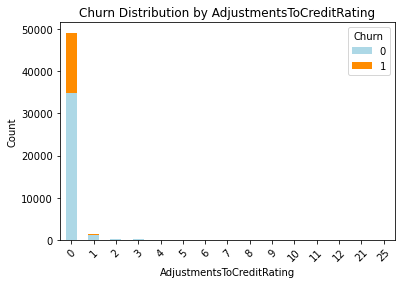

<Figure size 1080x432 with 0 Axes>

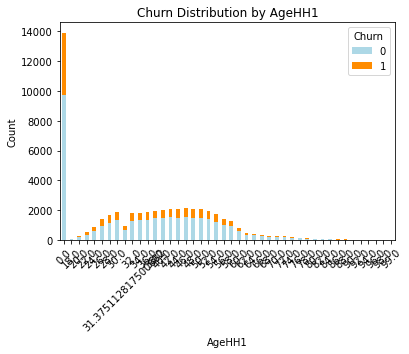

<Figure size 1080x432 with 0 Axes>

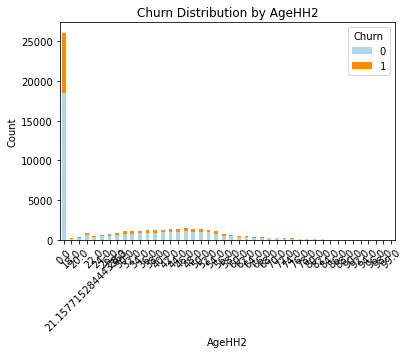

<Figure size 1080x432 with 0 Axes>

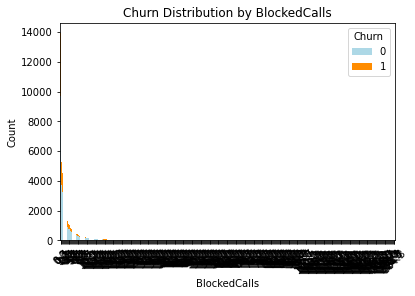

<Figure size 1080x432 with 0 Axes>

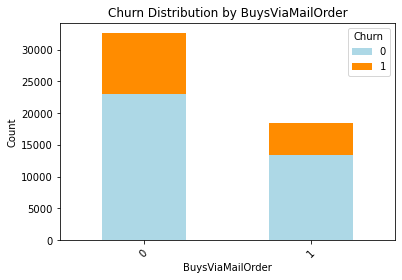

<Figure size 1080x432 with 0 Axes>

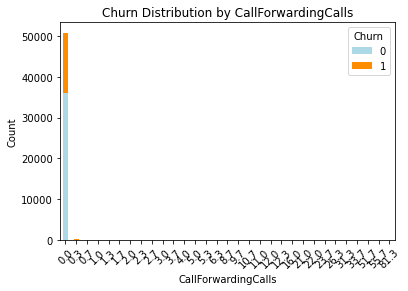

<Figure size 1080x432 with 0 Axes>

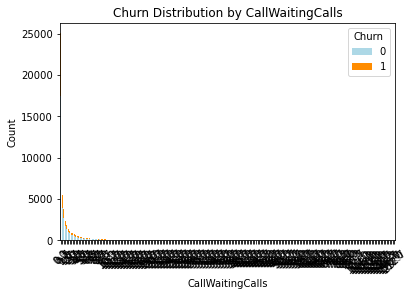

<Figure size 1080x432 with 0 Axes>

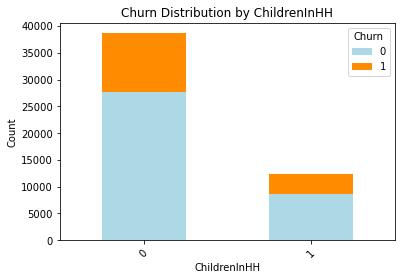

<Figure size 1080x432 with 0 Axes>

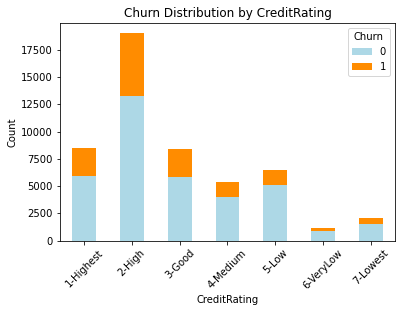

<Figure size 1080x432 with 0 Axes>

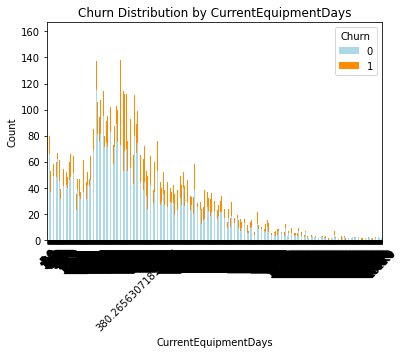

<Figure size 1080x432 with 0 Axes>

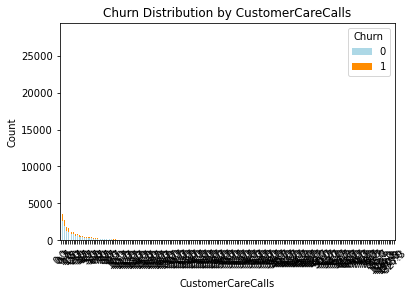

<Figure size 1080x432 with 0 Axes>

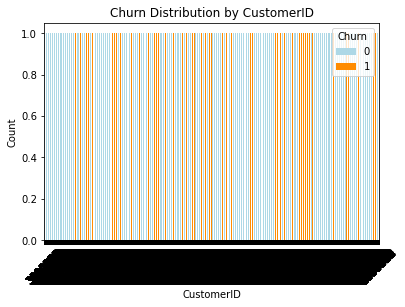

<Figure size 1080x432 with 0 Axes>

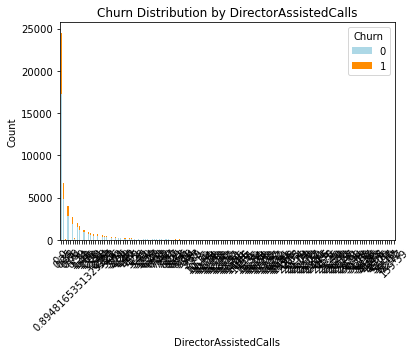

<Figure size 1080x432 with 0 Axes>

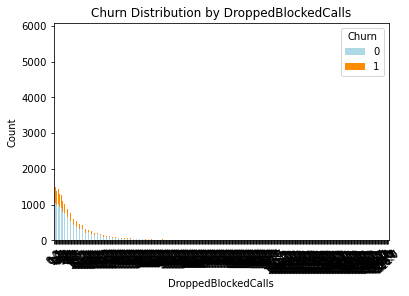

<Figure size 1080x432 with 0 Axes>

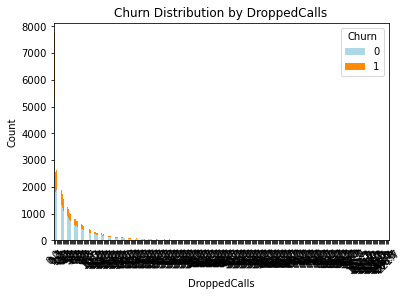

<Figure size 1080x432 with 0 Axes>

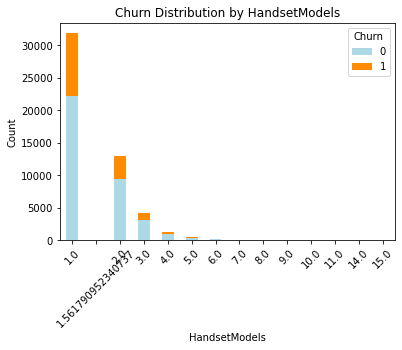

<Figure size 1080x432 with 0 Axes>

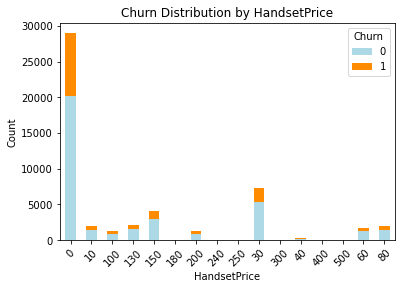

<Figure size 1080x432 with 0 Axes>

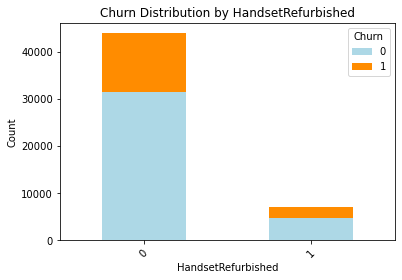

<Figure size 1080x432 with 0 Axes>

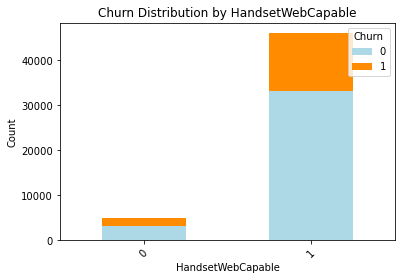

<Figure size 1080x432 with 0 Axes>

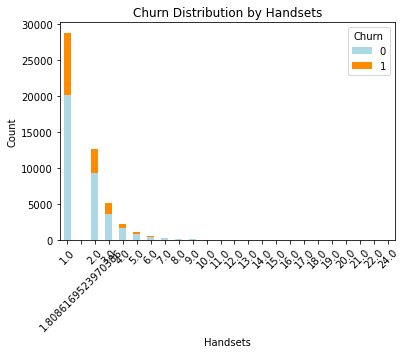

<Figure size 1080x432 with 0 Axes>

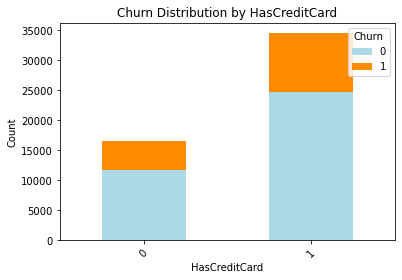

<Figure size 1080x432 with 0 Axes>

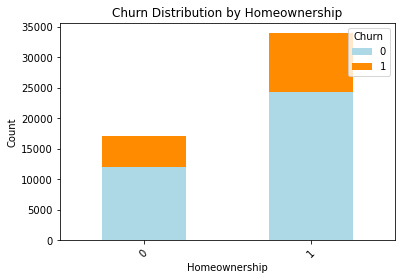

<Figure size 1080x432 with 0 Axes>

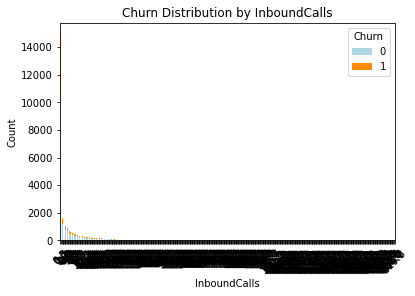

<Figure size 1080x432 with 0 Axes>

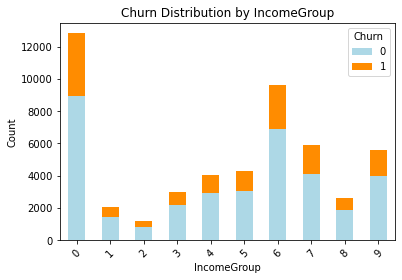

<Figure size 1080x432 with 0 Axes>

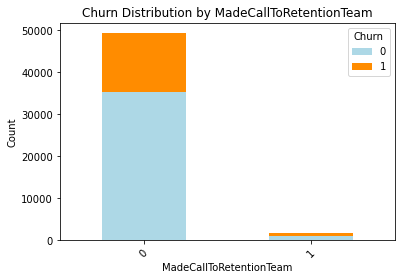

<Figure size 1080x432 with 0 Axes>

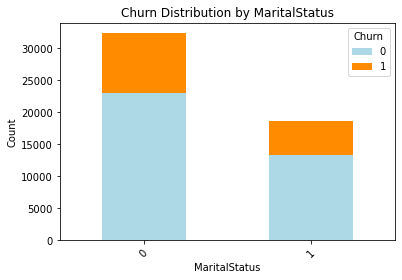

<Figure size 1080x432 with 0 Axes>

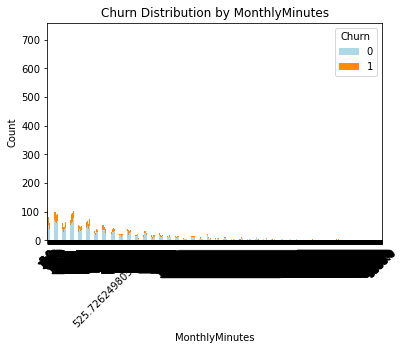

<Figure size 1080x432 with 0 Axes>

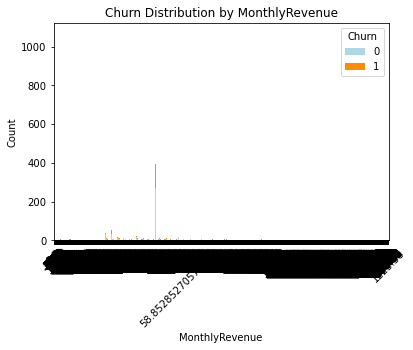

<Figure size 1080x432 with 0 Axes>

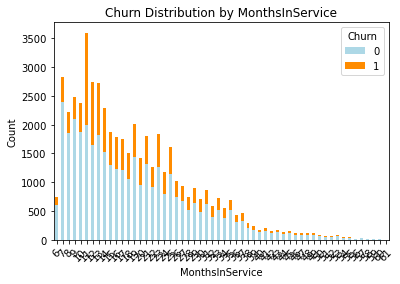

<Figure size 1080x432 with 0 Axes>

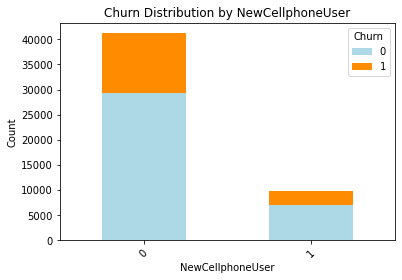

<Figure size 1080x432 with 0 Axes>

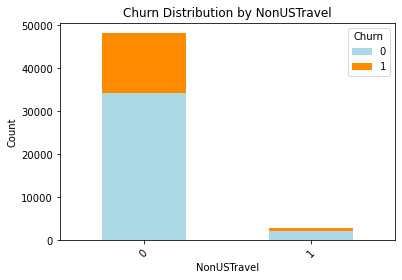

<Figure size 1080x432 with 0 Axes>

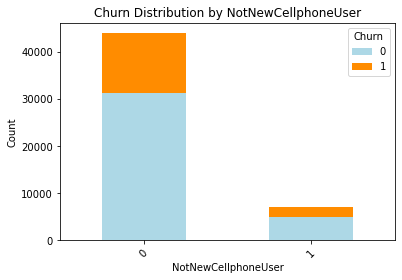

<Figure size 1080x432 with 0 Axes>

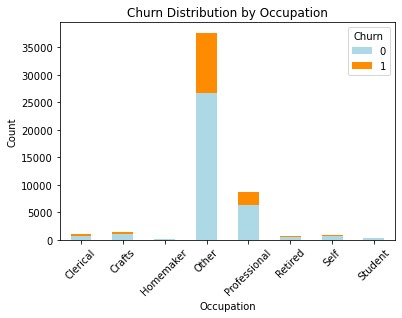

<Figure size 1080x432 with 0 Axes>

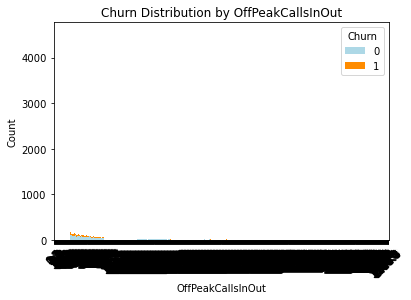

<Figure size 1080x432 with 0 Axes>

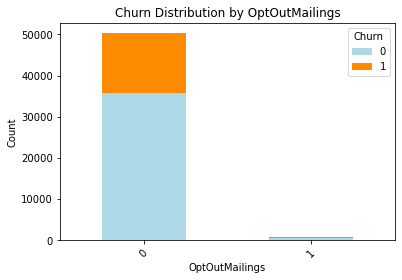

<Figure size 1080x432 with 0 Axes>

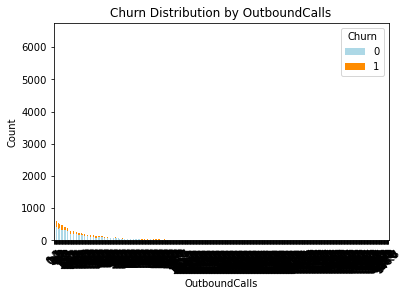

<Figure size 1080x432 with 0 Axes>

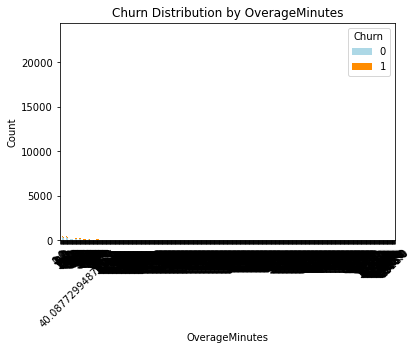

<Figure size 1080x432 with 0 Axes>

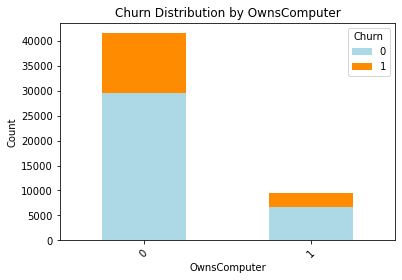

<Figure size 1080x432 with 0 Axes>

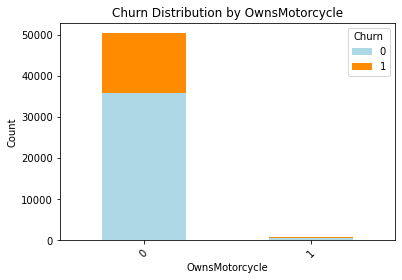

<Figure size 1080x432 with 0 Axes>

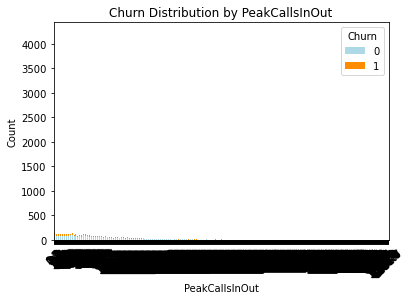

<Figure size 1080x432 with 0 Axes>

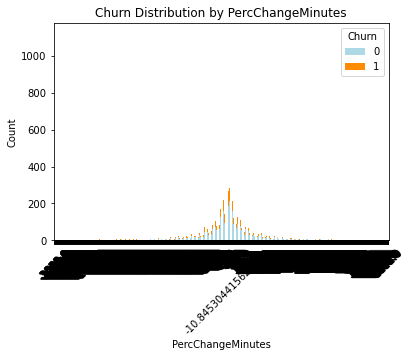

<Figure size 1080x432 with 0 Axes>

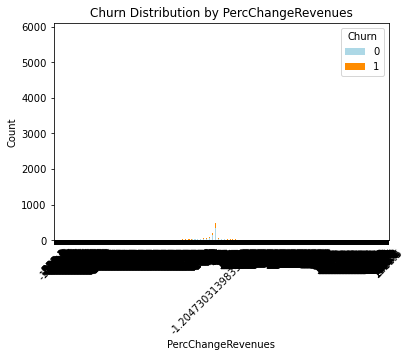

<Figure size 1080x432 with 0 Axes>

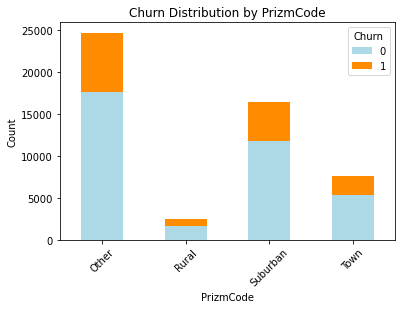

<Figure size 1080x432 with 0 Axes>

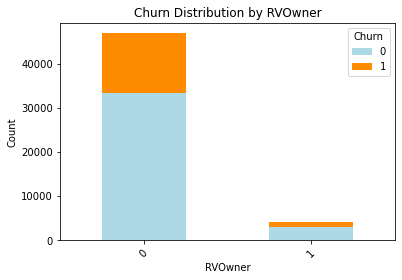

<Figure size 1080x432 with 0 Axes>

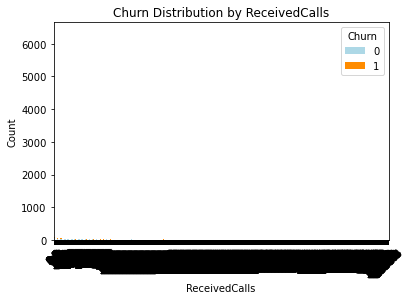

<Figure size 1080x432 with 0 Axes>

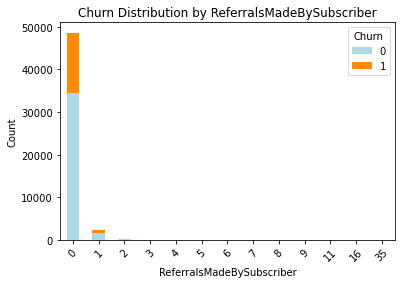

<Figure size 1080x432 with 0 Axes>

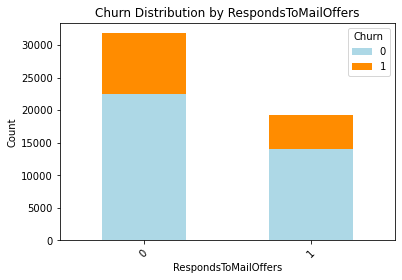

<Figure size 1080x432 with 0 Axes>

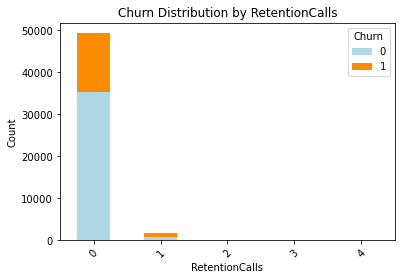

<Figure size 1080x432 with 0 Axes>

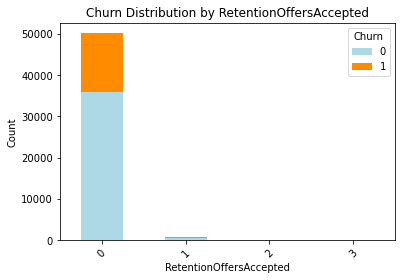

<Figure size 1080x432 with 0 Axes>

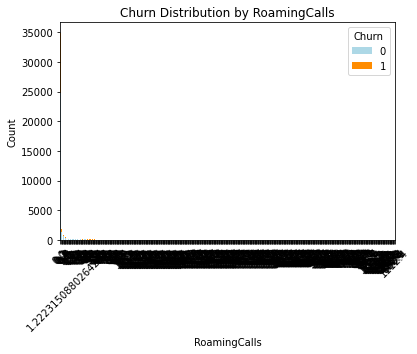

<Figure size 1080x432 with 0 Axes>

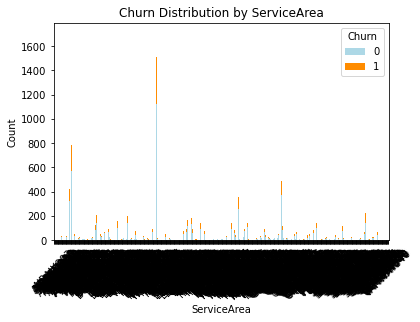

<Figure size 1080x432 with 0 Axes>

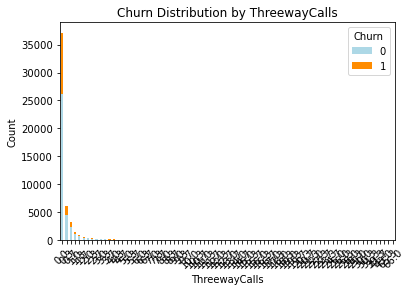

<Figure size 1080x432 with 0 Axes>

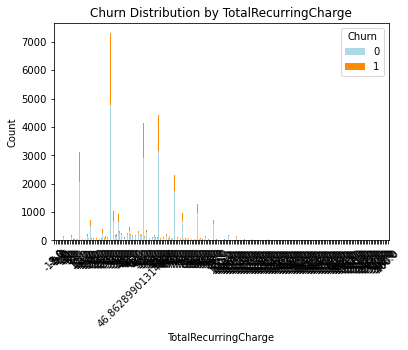

<Figure size 1080x432 with 0 Axes>

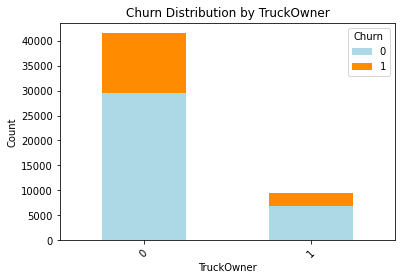

<Figure size 1080x432 with 0 Axes>

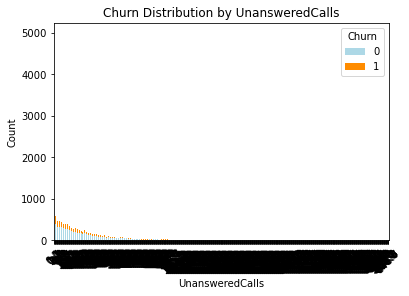

<Figure size 1080x432 with 0 Axes>

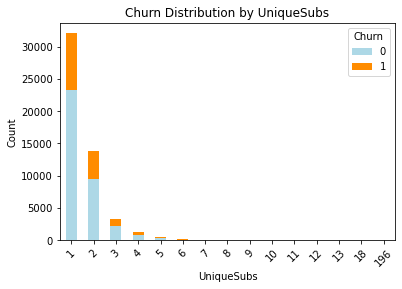

In [22]:
columns_to_plot = train_df.columns.difference(['Churn'])

for column in columns_to_plot:
    plt.figure(figsize=(15, 6))
    ax = train_df.groupby([column, 'Churn']).size().unstack().plot(kind='bar', stacked=True, color=['#ADD8E6','#FF8C00'])
    ax.set_ylabel('Count')
    ax.set_title(f'Churn Distribution by {column}')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()


# Detect outliers

In [23]:
from scipy import stats

columns_with_outliers = []

# Iterate over each column in train_df
for column in train_df.columns:
    if train_df[column].dtype in [np.int64, np.float64]:
        # Calculate Z-scores for the numeric column
        z_scores = np.abs(stats.zscore(train_df[column]))

        # Set a threshold for the Z-score above which a data point is considered an outlier
        z_threshold = 3

        # Find the indices of outliers based on the Z-scores
        z_outlier_indices = np.where(z_scores > z_threshold)

        Q1 = train_df[column].quantile(0.25)
        Q3 = train_df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Find the indices of outliers based on the IQR
        iqr_outlier_indices = np.where((train_df[column] < (Q1 - 1.5 * IQR)) | (train_df[column] > (Q3 + 1.5 * IQR)))

        # Check if either Z-score or IQR method detected outliers
        if len(z_outlier_indices[0]) > 0 or len(iqr_outlier_indices[0]) > 0:
            columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'MadeCallToRetentionTeam']


# Boxplots

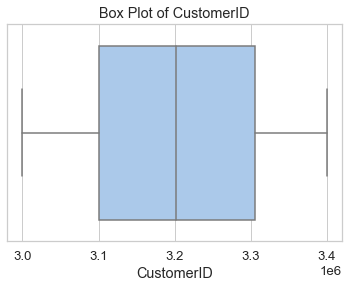

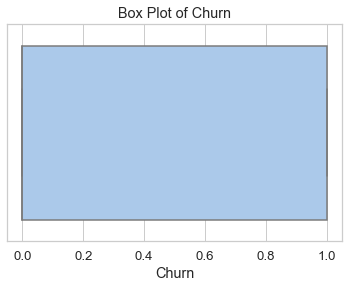

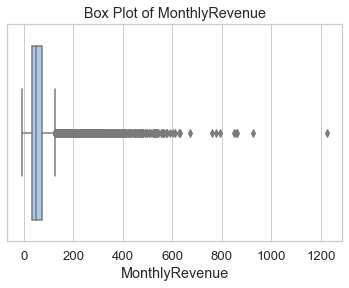

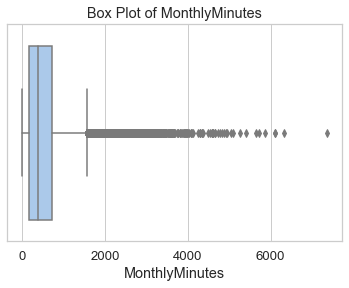

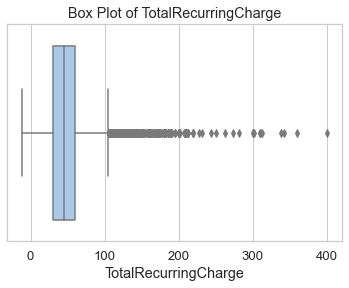

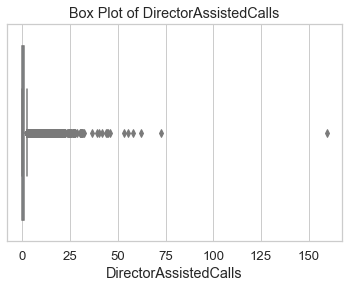

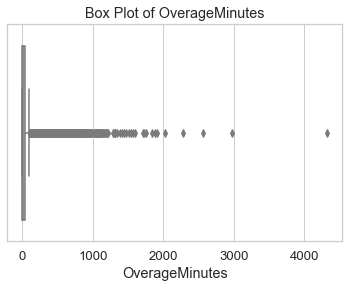

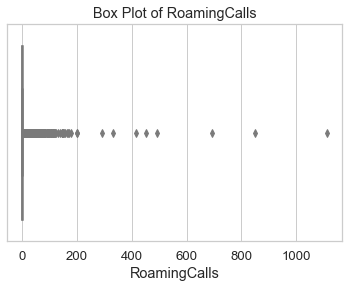

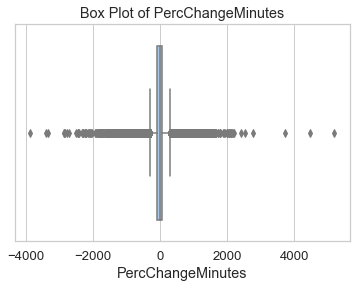

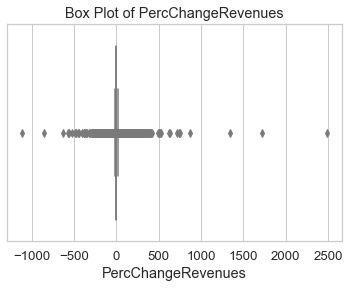

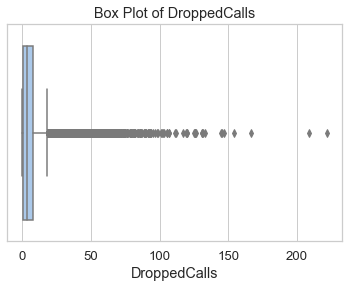

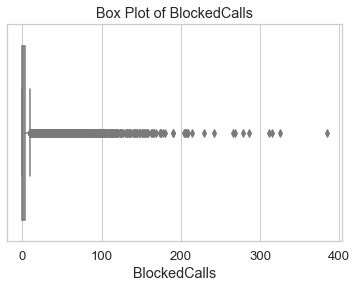

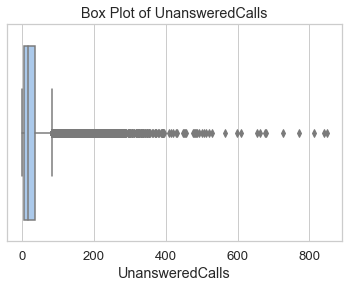

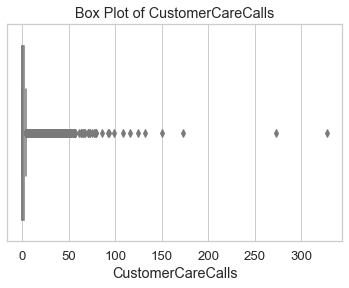

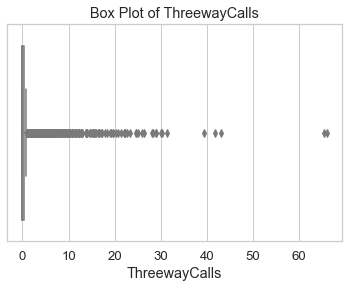

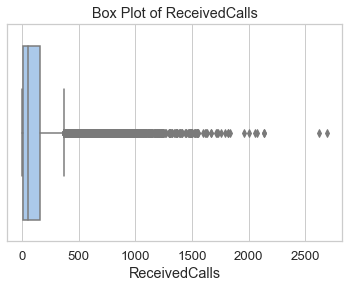

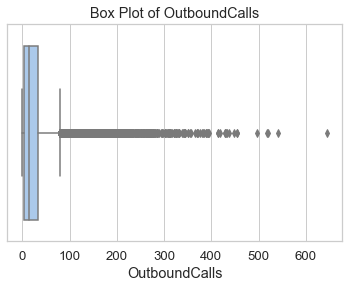

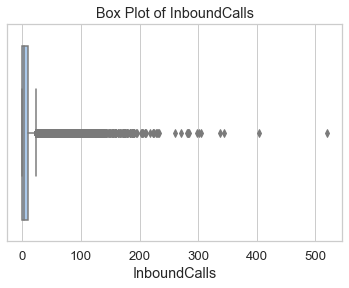

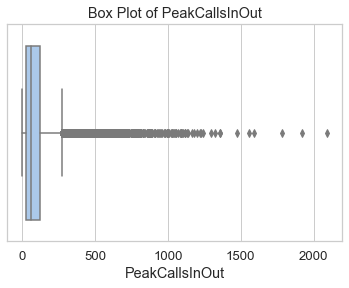

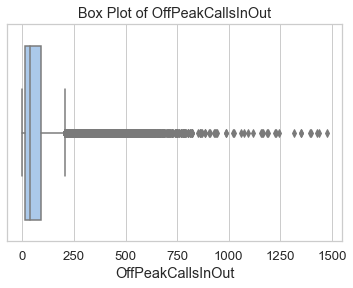

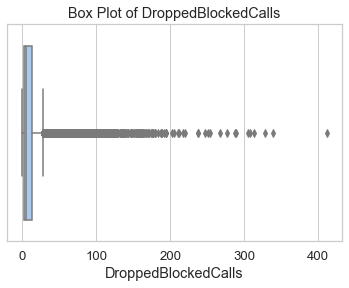

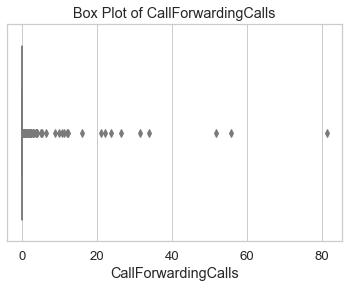

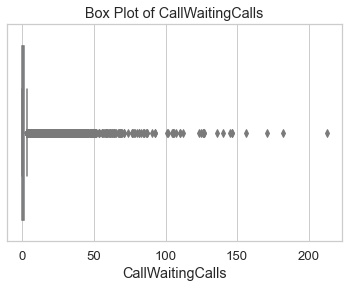

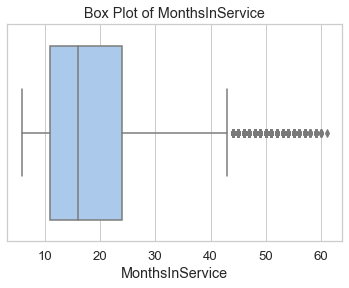

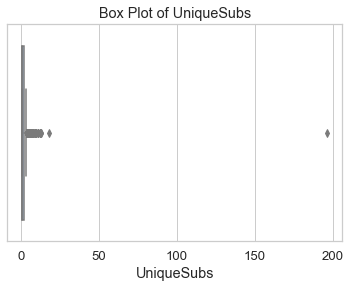

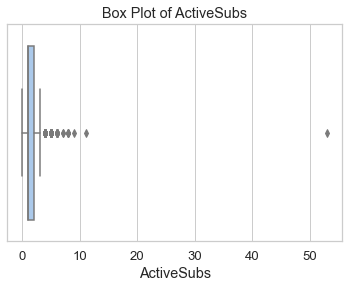

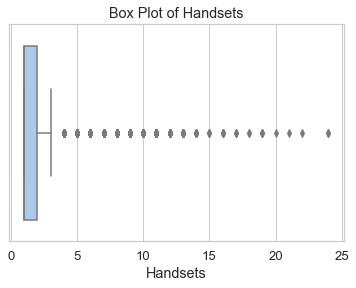

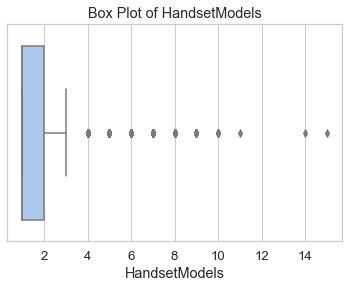

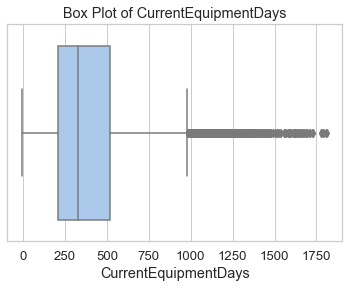

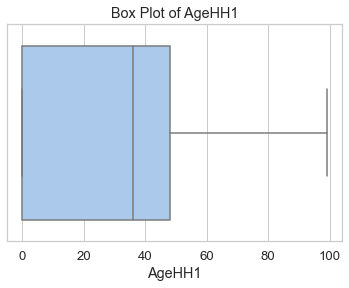

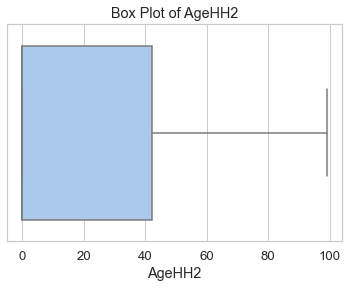

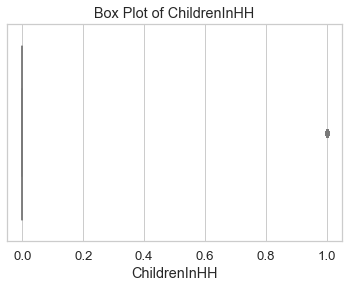

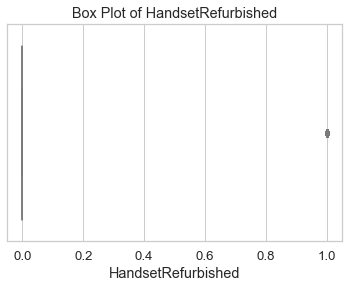

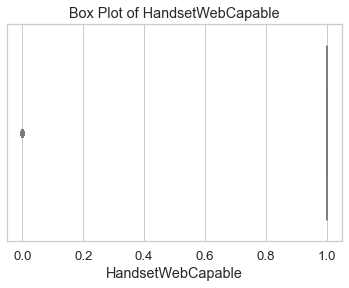

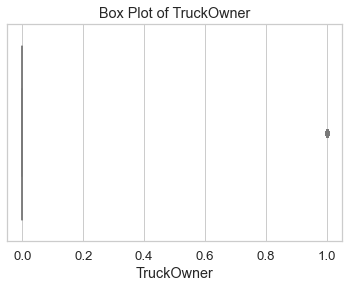

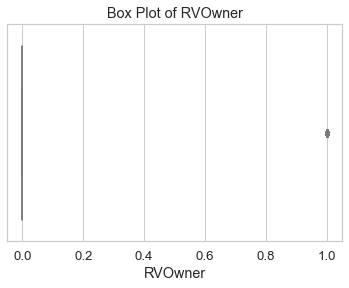

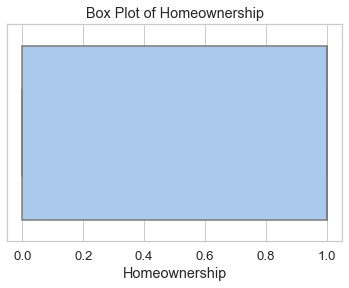

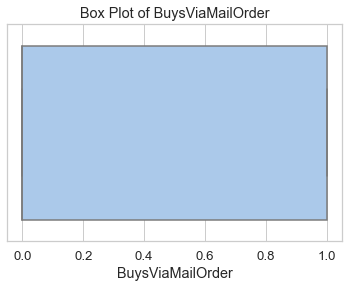

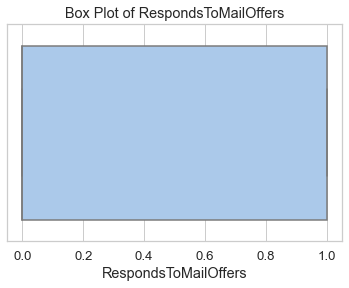

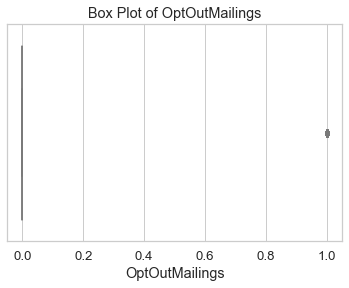

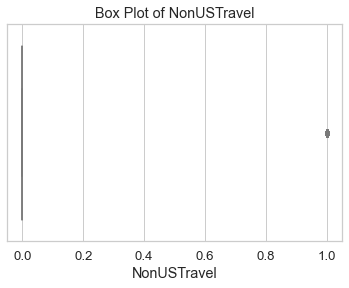

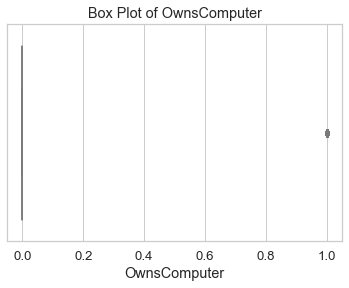

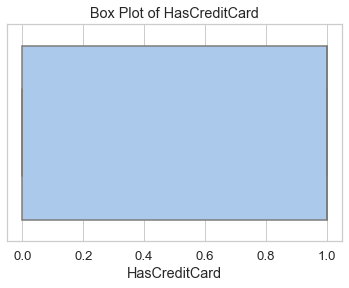

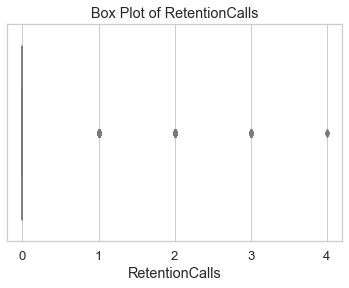

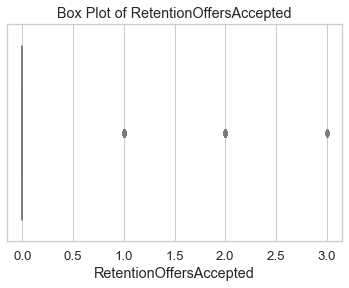

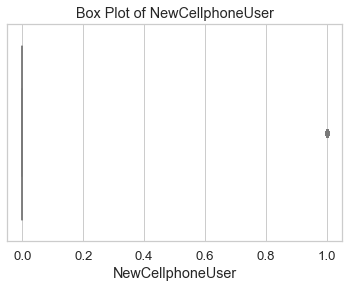

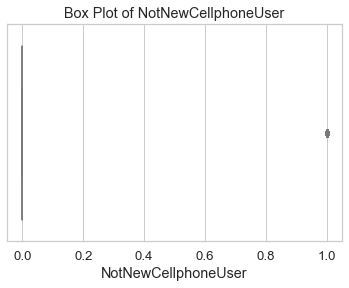

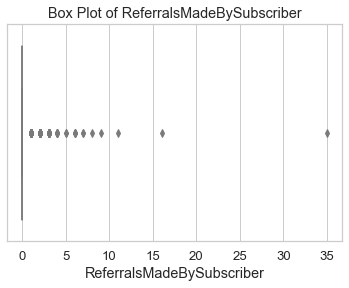

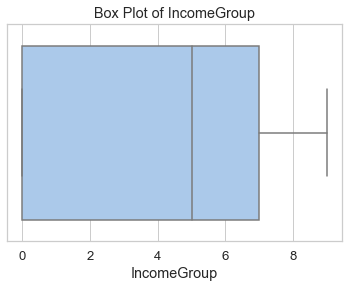

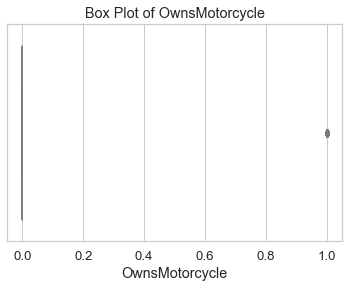

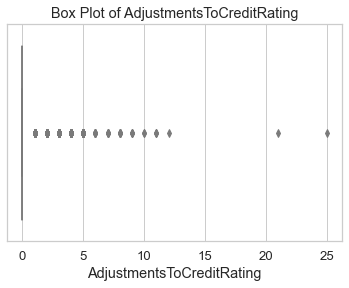

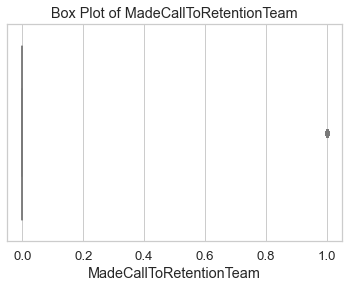

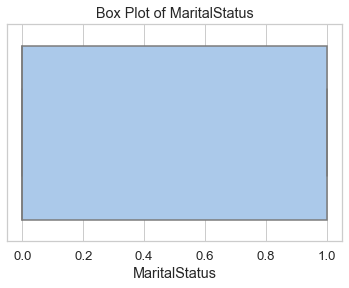

In [24]:
numeric_columns = train_df.select_dtypes(include=np.number).columns

summary_stats = train_df[numeric_columns].describe()

#Detect outliers using the interquartile range (IQR) method
q1 = summary_stats.loc['25%']
q3 = summary_stats.loc['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (train_df[numeric_columns] < lower_bound) | (train_df[numeric_columns] > upper_bound)

# Identify columns with outliers
columns_with_outliers = outliers.any()

sns.set_palette("pastel")

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x=train_df[column], palette="pastel")
    ax.set_facecolor('white') 
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

# Heatmap

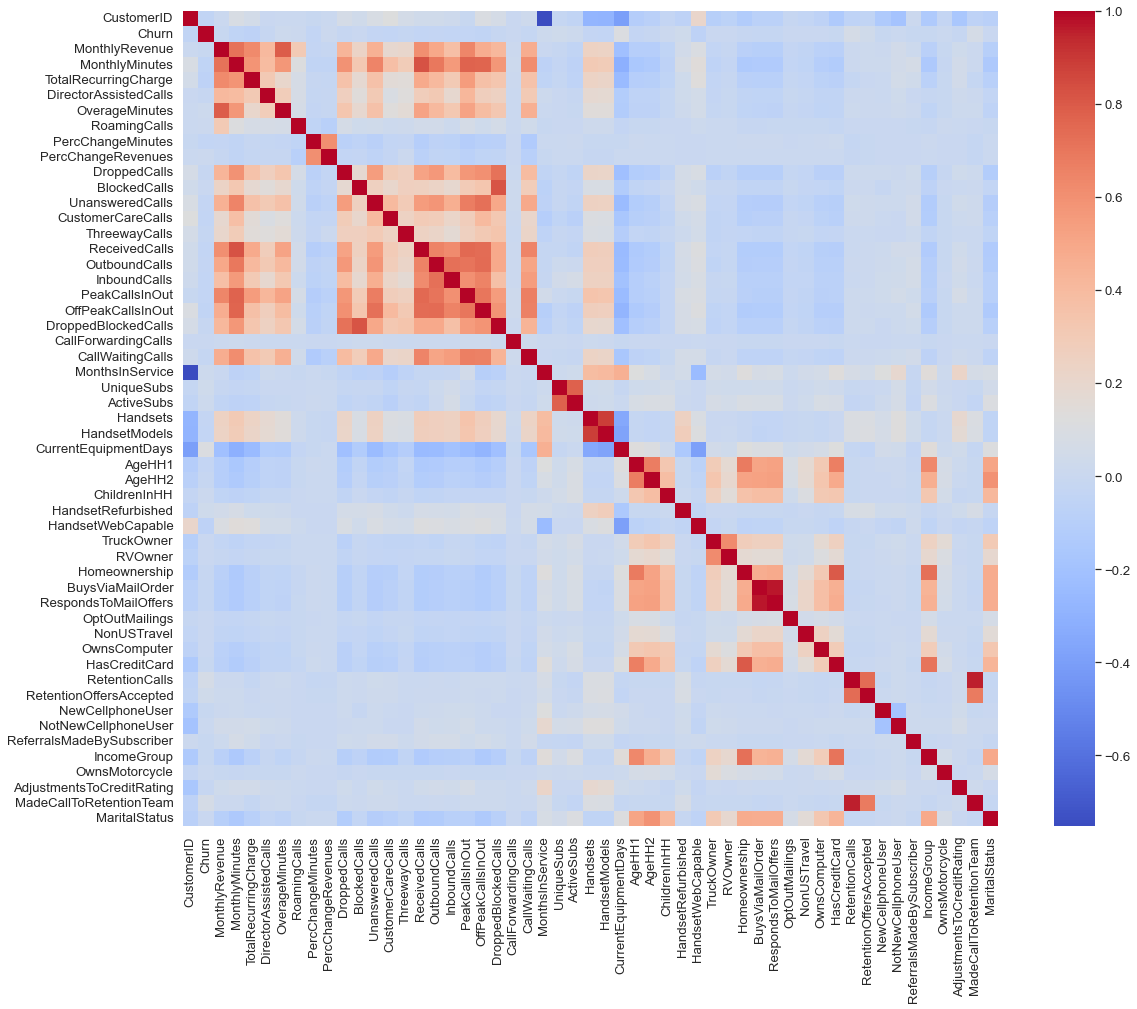

In [25]:
cor = train_df.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(cor,square=True, cmap='coolwarm')

plt.show()

In [26]:
correlation = train_df.corr()['Churn']

# Sort the correlation values in descending order
correlation_sorted = correlation.sort_values(ascending=False)

negative_correlation_vars = correlation[correlation < 0].index

print(correlation_sorted)

Churn                        1.000000
CurrentEquipmentDays         0.103687
MadeCallToRetentionTeam      0.067393
RetentionCalls               0.065301
RetentionOffersAccepted      0.034953
UniqueSubs                   0.034522
HandsetRefurbished           0.029949
MonthsInService              0.018703
OverageMinutes               0.016428
ActiveSubs                   0.015515
PercChangeRevenues           0.011053
RoamingCalls                 0.010858
ChildrenInHH                 0.009562
OwnsMotorcycle               0.007295
NotNewCellphoneUser          0.006728
OptOutMailings               0.000102
CallForwardingCalls         -0.001449
OwnsComputer                -0.002046
NonUSTravel                 -0.002941
RVOwner                     -0.003454
MaritalStatus               -0.004666
TruckOwner                  -0.004818
BlockedCalls                -0.005530
NewCellphoneUser            -0.007695
HasCreditCard               -0.008618
ReferralsMadeBySubscriber   -0.010686
MonthlyReven

## <center><div style="font-family: Trebuchet MS; background-color: #AEA6F1; color: #AED6F1; padding: 12px; line-height: 1;">END</div></center>